In [6]:
# Importing the Data Packages
import pandas as pd
import numpy as np
import os 
import matplotlib as plt
from matplotlib.pyplot import boxplot
from sklearn.linear_model import LogisticRegression

In [7]:
current_directory = os.getcwd()
print(current_directory)

C:\Users\briel


In [8]:
new_directory_path = r'C:\Users\briel\downloads'
os.chdir(new_directory_path)

In [9]:
updated_dir = os.getcwd()
print(updated_dir)

C:\Users\briel\downloads


In [11]:
# Importing File for Hospital 1
file_path = "C:\\Users\\briel\\downloads\\Hospital1.txt"

try:
    with open(file_path, "r") as file:
        content = file.read()
        print(content)
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except IOError:
    print("An error occured while reading the file.")

PatientID, Readmission, StaffSatisfaction, CleanlinessSatisfaction, FoodSatisfaction, ComfortSatisfaction, CommunicationSatisfaction
101, 1, 4, 5, 3, 4, 5
102, 0, 3, 2, 4, 2, 3
103, 1, 5, 4, 5, 4, 4
104, 0, 5, 3, 5, 4, 5
105, 1, 4, 5, 3, 4, 4
106, 1, 2, 3, 2, 3, 3
107, 0, 3, 2, 3, 4, 3
108, 0, 5, 5, 4, 5, 5
109, 1, 4, 4, 4, 4, 4
110, 0, 3, 3, 3, 4, 3
111, 1, 4, 5, 4, 4, 5
112, 0, 2, 3, 2, 3, 2
113, 1, 3, 4, 3, 4, 3
114, 1, 3, 3, 3, 2, 3
115, 0, 5, 4, 5, 5, 5
116, 1, 4, 3, 4, 4, 4
117, 0, 2, 2, 2, 3, 3
118, 0, 5, 5, 4, 4, 5
119, 1, 4, 4, 4, 4, 4
120, 0, 3, 3, 3, 4, 3
121, 1, 4, 5, 5, 4, 4
122, 1, 3, 4, 4, 4, 3
123, 0, 4, 3, 4, 3, 4
124, 0, 2, 2, 2, 3, 3
125, 1, 3, 4, 3, 4, 3
126, 0, 4, 5, 5, 5, 5
127, 1, 3, 4, 4, 4, 3
128, 0, 4, 3, 4, 3, 4
129, 0, 2, 2, 2, 3, 3
130, 1, 3, 4, 3, 4, 3
131, 1, 4, 5, 3, 4, 5
132, 0, 3, 2, 4, 2, 3
133, 1, 5, 4, 5, 4, 4
134, 0, 5, 3, 5, 4, 5
135, 1, 4, 5, 3, 4, 4
136, 1, 2, 3, 2, 3, 3
137, 0, 3, 2, 3, 4, 3
138, 0, 5, 5, 4, 5, 5
139, 1, 4, 4, 4, 4, 4
140, 0, 3

In [13]:
# Organizing Data for Hospital 1
filepath = 'Hospital1.txt'
df = pd.read_csv(filepath)

df = pd.read_csv(file_path)

print(df)

print(df.columns)

    PatientID   Readmission   StaffSatisfaction   CleanlinessSatisfaction  \
0         101             1                   4                         5   
1         102             0                   3                         2   
2         103             1                   5                         4   
3         104             0                   5                         3   
4         105             1                   4                         5   
..        ...           ...                 ...                       ...   
69        170             0                   3                         3   
70        171             1                   4                         5   
71        172             0                   2                         3   
72        173             1                   3                         4   
73        174             1                   3                         3   

     FoodSatisfaction   ComfortSatisfaction   CommunicationSatisfaction  
0

In [14]:
# Descriptive Statistics for Hospital 1
num_readmitted = np.sum(df[' Readmission'])
satisfaction_staff = np.mean(df[' StaffSatisfaction'])
satisfaction_cleanliness = np.mean(df[' CleanlinessSatisfaction'])
satisfaction_food = np.mean(df[' FoodSatisfaction'])
satisfaction_comfort = np.mean(df[' ComfortSatisfaction'])
satisfaction_communication = np.mean(df[' CommunicationSatisfaction'])

print(f"Number of patients readmitted: {num_readmitted}.")
print(f"Average staff satisfaction: {satisfaction_staff}.")
print(f"Average cleanliness satisfaction: {satisfaction_cleanliness}.")
print(f"Average food satisfaction: {satisfaction_food}.")
print(f"Average comfort satisfaction: {satisfaction_comfort}.")
print(f"Average communication satisfaction: {satisfaction_communication}.")

Number of patients readmitted: 38.
Average staff satisfaction: 3.5135135135135136.
Average cleanliness satisfaction: 3.608108108108108.
Average food satisfaction: 3.5135135135135136.
Average comfort satisfaction: 3.7162162162162162.
Average communication satisfaction: 3.7027027027027026.


{'whiskers': [<matplotlib.lines.Line2D at 0x1dddfa5ee10>,
 'caps': [<matplotlib.lines.Line2D at 0x1dddfa6c850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dddf69fcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dddfa6e110>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dddfa6ec10>],
 'means': []}

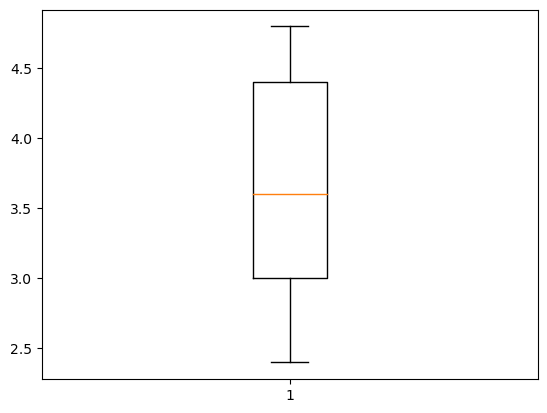

In [15]:
# Calculate + Display Overall Satisfaction for Hospital 1
df['OverallSatisfaction'] = df[[' StaffSatisfaction', ' CleanlinessSatisfaction', ' FoodSatisfaction', ' ComfortSatisfaction', ' CommunicationSatisfaction']].mean(axis=1)

boxplot(df['OverallSatisfaction'], showfliers=True)

In [16]:
# Logistic Regression for Hospital 1
X = df['OverallSatisfaction'].values.reshape(-1, 1)
Y = df[' Readmission']

log_reg = LogisticRegression().fit(X, Y)


# Correlation Coefficient Results for Hospital 1
correlation_coefficient = log_reg.coef_[0][0]

if correlation_coefficient > 0:
    print("Logistic Regression results indicated a: ")
    if correlation_coefficient > 0.5:
        print("Moderate correlation")
    elif correlation_coefficient > 0.7:
        print("Strong correlation")
    else:
        print("Weak correlation")
else:
    print("Logistic regression results indicated: ")
    print("No correlation")
    
print(f"The correlation coefficient was {correlation_coefficient}")


Logistic Regression results indicated a: 
Weak correlation
The correlation coefficient was 0.39127206231656786


(2.0, 5.0)

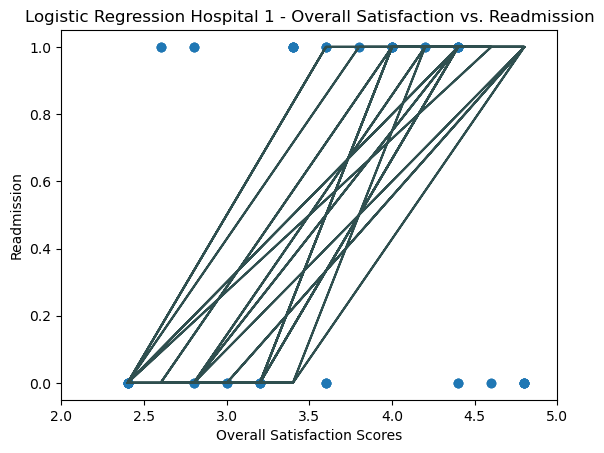

In [20]:
# Data Visulization Plot for Hospital 1
plt.pyplot.scatter(X, Y)
plt.pyplot.xlabel('Overall Satisfaction Scores')
plt.pyplot.ylabel('Readmission')
plt.pyplot.title('Logistic Regression Hospital 1 - Overall Satisfaction vs. Readmission')
plt.pyplot.plot(X, log_reg.predict(X), color = 'darkslategrey')
plt.pyplot.xlim(2, 5)

In [21]:
# Importing File for Hospital 2
file_path = "C:\\Users\\briel\\downloads\\Hospital2.txt"

try:
    with open(file_path, "r") as file:
        content = file.read()
        print(content)
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except IOError:
    print("An error occured while reading the file.")

PatientID, Readmission, StaffSatisfaction, CleanlinessSatisfaction, FoodSatisfaction, ComfortSatisfaction, CommunicationSatisfaction
101, 1, 4, 5, 3, 4, 5
102, 0, 3, 2, 4, 2, 3
103, 1, 5, 4, 5, 4, 4
104, 0, 5, 3, 5, 4, 5
105, 1, 4, 5, 3, 4, 4
106, 1, 2, 3, 2, 3, 3
107, 0, 3, 2, 3, 4, 3
108, 0, 5, 5, 4, 5, 5
109, 1, 4, 4, 4, 4, 4
110, 0, 3, 3, 3, 4, 3
111, 1, 4, 5, 4, 4, 5
112, 0, 2, 3, 2, 3, 2
113, 1, 3, 4, 3, 4, 3
114, 1, 3, 3, 3, 2, 3
115, 0, 5, 4, 5, 5, 5
116, 1, 4, 3, 4, 4, 4
117, 0, 2, 2, 2, 3, 3
118, 0, 5, 5, 4, 4, 5
119, 1, 4, 4, 4, 4, 4
120, 0, 3, 3, 3, 4, 3
121, 1, 4, 5, 5, 4, 4
122, 1, 3, 4, 4, 4, 3
123, 0, 4, 3, 4, 3, 4
124, 0, 2, 2, 2, 3, 3
125, 1, 3, 4, 3, 4, 3
126, 0, 4, 5, 5, 5, 5
127, 1, 3, 4, 4, 4, 3
128, 0, 4, 3, 4, 3, 4
129, 0, 2, 2, 2, 3, 3
130, 1, 3, 4, 3, 4, 3
131, 1, 4, 5, 3, 4, 5
132, 0, 3, 2, 4, 2, 3
133, 1, 5, 4, 5, 4, 4
134, 0, 5, 3, 5, 4, 5
135, 1, 4, 5, 3, 4, 4
136, 1, 2, 3, 2, 3, 3
137, 0, 3, 2, 3, 4, 3
138, 0, 5, 5, 4, 5, 5
139, 1, 4, 4, 4, 4, 4
140, 0, 3

In [22]:
# Organizing Data for Hospital 2
filepath = 'Hospital2.txt'
df = pd.read_csv(filepath)

df = pd.read_csv(file_path)

print(df)

print(df.columns)

    PatientID   Readmission   StaffSatisfaction   CleanlinessSatisfaction  \
0         101             1                   4                         5   
1         102             0                   3                         2   
2         103             1                   5                         4   
3         104             0                   5                         3   
4         105             1                   4                         5   
5         106             1                   2                         3   
6         107             0                   3                         2   
7         108             0                   5                         5   
8         109             1                   4                         4   
9         110             0                   3                         3   
10        111             1                   4                         5   
11        112             0                   2                         3   

In [23]:
# Descriptive Statistics for Hospital 2
num_readmitted = np.sum(df[' Readmission'])
satisfaction_staff = np.mean(df[' StaffSatisfaction'])
satisfaction_cleanliness = np.mean(df[' CleanlinessSatisfaction'])
satisfaction_food = np.mean(df[' FoodSatisfaction'])
satisfaction_comfort = np.mean(df[' ComfortSatisfaction'])
satisfaction_communication = np.mean(df[' CommunicationSatisfaction'])

print(f"Number of patients readmitted: {num_readmitted}.")
print(f"Average staff satisfaction: {satisfaction_staff}.")
print(f"Average cleanliness satisfaction: {satisfaction_cleanliness}.")
print(f"Average food satisfaction: {satisfaction_food}.")
print(f"Average comfort satisfaction: {satisfaction_comfort}.")
print(f"Average communication satisfaction: {satisfaction_communication}.")

Number of patients readmitted: 29.
Average staff satisfaction: 3.526315789473684.
Average cleanliness satisfaction: 3.6315789473684212.
Average food satisfaction: 3.56140350877193.
Average comfort satisfaction: 3.754385964912281.
Average communication satisfaction: 3.719298245614035.


{'whiskers': [<matplotlib.lines.Line2D at 0x1dde031f490>,
 'caps': [<matplotlib.lines.Line2D at 0x1dde032d750>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dde03017d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dde0345410>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dde03ad9d0>],
 'means': []}

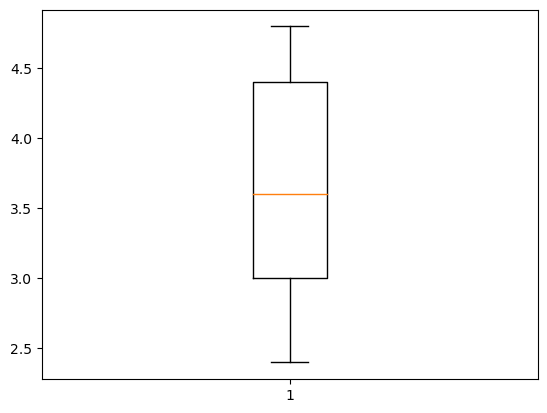

In [24]:
# Calculate + Display Overall Satisfaction for Hospital 2
df['OverallSatisfaction'] = df[[' StaffSatisfaction', ' CleanlinessSatisfaction', ' FoodSatisfaction', ' ComfortSatisfaction', ' CommunicationSatisfaction']].mean(axis=1)

boxplot(df['OverallSatisfaction'], showfliers=True)

In [25]:
# Logistic Regression for Hospital 2
X = df['OverallSatisfaction'].values.reshape(-1, 1)
Y = df[' Readmission']

log_reg = LogisticRegression().fit(X, Y)


# Correlation Coefficient Results for Hospital 2
correlation_coefficient = log_reg.coef_[0][0]

if correlation_coefficient > 0:
    print("Logistic Regression results indicated a: ")
    if correlation_coefficient > 0.5:
        print("Moderate correlation")
    elif correlation_coefficient > 0.7:
        print("Strong correlation")
    else:
        print("Weak correlation")
else:
    print("Logistic regression results indicated: ")
    print("No correlation")
    
print(f"The correlation coefficient was {correlation_coefficient}")

Logistic Regression results indicated a: 
Weak correlation
The correlation coefficient was 0.3303440182897462


(2.0, 5.0)

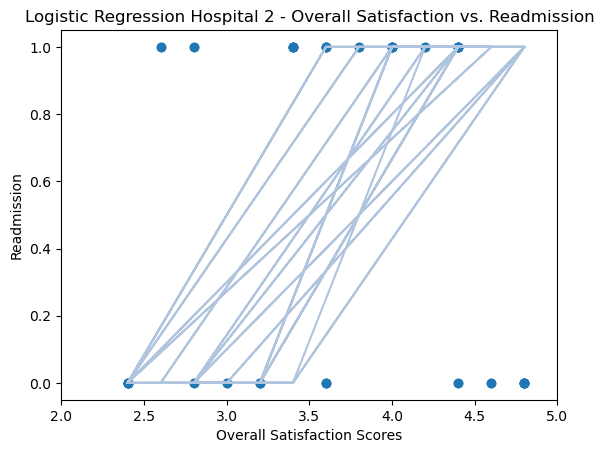

In [27]:
# Data Visulization Plot for Hospital 2
plt.pyplot.scatter(X, Y)
plt.pyplot.xlabel('Overall Satisfaction Scores')
plt.pyplot.ylabel('Readmission')
plt.pyplot.title('Logistic Regression Hospital 2 - Overall Satisfaction vs. Readmission')
plt.pyplot.plot(X, log_reg.predict(X), color = 'lightsteelblue')
plt.pyplot.xlim(2, 5)

In [47]:
# Hospital Comparison - Readmission Rates
readmission_rate_1 = 0.39127206231656786
readmission_rate_2 = 0.3303440182897462

if readmission_rate_1 > readmission_rate_2:
    print("Readmission Rate 1 is greater.")
elif readmission_rate_1 < readmission_rate_2:
    print("Readmission Rate 2 is greater.")
else:
    print("Both readmission rates are equal.")


# Hospital Comparison - Satisfaction Scores
satisfaction_scores_1 = 3.5135135135135136, 3.608108108108108, 3.5135135135135136, 3.7162162162162162, 3.7027027027027026
satisfaction_scores_2 = 3.526315789473684, 3.6315789473684212, 3.56140350877193, 3.75438596491228, 3.719298245614035

if satisfaction_scores_1 > satisfaction_scores_2:
    print("Satisfaction Scores 1 is greater.")
elif satisfaction_scores_1 < satisfaction_scores_2:
    print("Satisfaction Scores 2 is greater.")
else:
    print("Both satisfaction scores are equal.")

# Hospital Comparison - Correlation Results
correlation_coefficient1 = 0.39127206231656786
correlation_coefficient2 = 0.3303440182897462

if correlation_coefficient1 > correlation_coefficient2:
    print("Correlation coefficient 1 is greater.")
elif correlation_coefficient1 < correlation_coefficient2:
    print("Correlation coefficient 2 is greater.")
else:
    print("Both correlation coefficients are equal.")


Readmission Rate 1 is greater.
Satisfaction Scores 2 is greater.
Correlation coefficient 1 is greater.


In [49]:
# Hospital Comparison Explanation 
print("Based on the data, we can see that Hospital 2 has slightly higher satisfaction scores than Hospital 1 and a weaker correlation betweeen overall satisfaction scores and readmission rates.")
print("Both hospitals have very medium overall ratings, with the overall rates being in the 3s, which is considered average. Based on the data, Hospital 2 may be doing better than Hospital 1 in terms of satisfaction scores and readmission rates.")

Based on the data, we can see that Hospital 2 has slightly higher satisfaction scores than Hospital 1 and a weaker correlation betweeen overall satisfaction scores and readmission rates.
Both hospitals have very medium overall ratings, with the overall rates being in the 3s, which is considered average. Based on the data, Hospital 2 may be doing better than Hospital 1 in terms of satisfaction scores and readmission rates.
